In [5]:
from twod_object import TwoDObject
from kalmanfilter2 import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

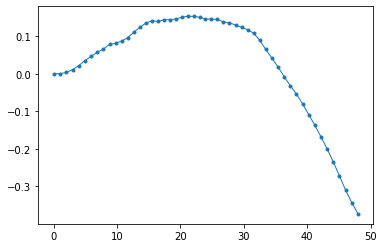

In [6]:
x = np.array([0, 0, 10, 0])
x.shape = (4, 1)
dt = 0.1
ep_normal = 1
ep_tangent = 0.1
nu = 0.1

gen = TwoDObject(x, dt, ep_normal, ep_tangent, nu)
t = 50
process = gen.process(t)
measure = gen.measure(process)

plt.plot(process[0], process[1], linewidth = 1, marker = '.')

In [7]:
initial_x = np.array([0, 0, 8, 0])

def f(x, u = None):
    out = np.array([0, 0, 0, 0])
    out[0] = x[0] + out[2] * dt
    out[1] = x[1] + out[3] * dt
    out[2] = np.random.normal(0, 1)
    out[3] = np.random.normal(0, 1)
    out.shape = (4, 1)
    return out

def h(x):
    out = np.array([0, 0])
    out.shape = (2, 1)
    out[0, 0] = x[0, 0]
    out[1, 0] = x[1, 0]
    return out

A = np.array([[1, 0, dt, 0],
             [0, 1, 0, dt],
             [0, 0, 1, 0],
             [0, 0, 0, 1]])

kf = KalmanFilter(initial_x, f, gen.process_jacobian, h, gen.Q, gen.R, H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]]))

prop = 0.2
output = np.empty((4, 1))
ellipses = []
for i in range(t+1):
    measure_t = measure[:,i]
    measure_t.shape = (2,1)
    if np.random.random() > prop:
        kf.predict(measure_t)
    else:
        kf.predict()
    kalman_output = kf.get_current_guess()
    output = np.append(output, kalman_output, axis=1)
    cov_ = kf.P[0:2, 0:2]
    mean_ = (kf.x_hat[0, 0], kf.x_hat[1, 0])
    ellipses.append(kf.cov_ellipse(mean = mean_, cov = cov_))
output = output[:,1:] # delete the first column (initial data)

[[0.04801587 0.04801587]
 [0.04801587 0.04801587]]
[[0.0317383  0.02466547]
 [0.02466547 0.02785349]]
[[0.03885946 0.01181563]
 [0.01181563 0.02416353]]
[[0.04920434 0.0032857 ]
 [0.0032857  0.02540587]]
[[ 0.05389514 -0.00025559]
 [-0.00025559  0.02798315]]
[[ 0.0549576  -0.00085027]
 [-0.00085027  0.03071613]]
[[ 0.05503879 -0.00048344]
 [-0.00048344  0.03300285]]
[[ 5.50597964e-02 -9.38772068e-05]
 [-9.38772068e-05  3.45745619e-02]]
[[5.51380282e-02 8.49496160e-05]
 [8.49496160e-05 3.54851271e-02]]
[[0.05521998 0.00010583]
 [0.00010583 0.03593161]]
[[0.05521998 0.00010583]
 [0.00010583 0.03593161]]
[[5.52726807e-02 6.54735914e-05]
 [6.54735914e-05 3.61084553e-02]]
[[5.52969493e-02 2.29500240e-05]
 [2.29500240e-05 3.61542608e-02]]
[[5.52969493e-02 2.29500240e-05]
 [2.29500240e-05 3.61542608e-02]]
[[ 5.53050148e-02 -2.11101881e-06]
 [-2.11101881e-06  3.61507418e-02]]
[[ 5.53050148e-02 -2.11101881e-06]
 [-2.11101881e-06  3.61507418e-02]]
[[ 5.53050148e-02 -2.11101881e-06]
 [-2.11101881

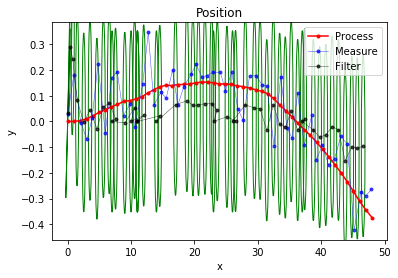

In [8]:
sz = 5 # size of marker
a = 0.7 # transparency
plt.plot(process[0], process[1], lw = 1.5, color = 'red', marker = '.', alpha = 1)
plt.plot(measure[0], measure[1], lw = 0.5, color = 'blue', marker = '.', alpha = a)
plt.plot(output[0], output[1], lw = 0.5, color='black', marker = '.', alpha = a)
plt.title("Position")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Process","Measure","Filter"])

axes  = plt.gca()
for ellipse in ellipses:
    axes.add_patch(ellipse)
plt.show()